# Importing Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from pandas import read_csv
import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pyodbc
from datetime import timedelta,date

import xgboost as xgb
from xgboost import plot_importance, plot_tree
import time

import threading

cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=CNQWSQLPDB01,1433;"
            "Database=sf_ismpali;"
            "UID=SmartFactory_Read;"
            "PWD=SweZU95xItiTREb652ri;")
cnxn = pyodbc.connect(cnxn_str)

cursor = cnxn.cursor()

df = pd.read_sql("SELECT * FROM CNQL6FZ01 Order by t_stamp ASC", cnxn)
df.head()
#df_fr = pd.read_sql("SELECT * FROM CNQL6FR01 Order by t_stamp ASC", cnxn)
#df_fr.head()

df.to_csv('CNQL6FZ01.csv')

In [2]:
df = pd.read_csv('CNQL6FZ01_5-16.csv')

In [3]:
df.t_stamp = pd.to_datetime(df.t_stamp)
df = df.set_index('t_stamp')
df.drop(['cnql6fz01_ndx'],axis = 1, inplace = True)
df.index.names = ['t_stamp']
df.index = pd.to_datetime(df.index)
df.tail()

,ReturnAir_Temp,OffProduct_LL_Temp,OnProduct_ML_Temp,OnProduct_UL_Temp,CoilA_AirOff_RTD_Error,CoilA_AirOff_Temp,CoilA_AirOn_RTD_Error,CoilA_AirOn_Temp,CoilA_Defrost,CoilA_Suction_Temp,...,Alm_Belt_Takeup_Up,Alm_Estop_OutFeed,Alm_ProdHeight_Intern,BeltRunning,CIP_Enabled,CIP_Running,DrumDrive_Status,DrumDrives_Running,EStopOK,CIP_Status
t_stamp,,,,,,,,,,,,,,,,,,,,,
2023-05-16 10:28:12.903,-15.130390,-25.248268,-22.980511,-26.382217,0.0,-19.0,0.0,-7.0,0.0,-42.0,...,0.0,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0
2023-05-16 10:29:12.907,-15.350594,-25.211704,-23.090294,-26.382217,0.0,-19.0,0.0,-7.0,0.0,-42.0,...,0.0,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0
2023-05-16 10:30:12.907,-15.754280,-25.211704,-23.090294,-26.455345,0.0,-19.0,0.0,-7.0,0.0,-42.0,...,0.0,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0
2023-05-16 10:31:12.907,-16.194656,-25.467743,-23.492565,-26.674824,0.0,-20.0,0.0,-8.0,0.0,-42.0,...,0.0,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0
2023-05-16 10:32:12.907,-16.891884,-25.833542,-24.150970,-27.150314,0.0,-21.0,0.0,-10.0,0.0,-42.0,...,0.0,0.0,0.0,1.0,1,0,2.0,1,1.0,1.0


In [4]:
df[df.ReturnAir_Temp.isna()]

,ReturnAir_Temp,OffProduct_LL_Temp,OnProduct_ML_Temp,OnProduct_UL_Temp,CoilA_AirOff_RTD_Error,CoilA_AirOff_Temp,CoilA_AirOn_RTD_Error,CoilA_AirOn_Temp,CoilA_Defrost,CoilA_Suction_Temp,...,Alm_Belt_Takeup_Up,Alm_Estop_OutFeed,Alm_ProdHeight_Intern,BeltRunning,CIP_Enabled,CIP_Running,DrumDrive_Status,DrumDrives_Running,EStopOK,CIP_Status
t_stamp,,,,,,,,,,,,,,,,,,,,,
2023-04-27 11:09:35.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
2023-05-12 14:32:26.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
2023-05-13 04:58:02.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


## Get weather

In [5]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Hourly,Daily
#https://dev.meteostat.net/formats.html#meteorological-data-units
#https://dev.meteostat.net/api/stations/hourly.html#endpoint

# Set time period
start = datetime(2023, 4, 13)
end = max(df.index)

# Create Point
location = Point(36.31874, -94.1208)

# Get daily data for 2018
weather_hr = Hourly(location, start, end)
weather_hr = weather_hr.fetch()

weather_d = Daily(location, start, end)
weather_d = weather_d.fetch()

#Date and time statements follow the ISO 8601 standard 
#(e.g. 2016-12-31 for December 31st 2016 and 23:59:58 for 23 hours, 59 minutes, and 58 seconds). 
#The time zone used by Meteostat is Coordinated Universal Time (UTC).
#Coordinated Universal Time is 5 hours ahead of Central Time
weather_hr.index = weather_hr.index - timedelta(hours=5)
#data[data.index == '2023-04-27 14:00:00']

In [6]:
weather_hr = weather_hr[['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'coco']]
weather_hr.rename(columns={i:i+'_hr' for i in weather_hr.columns}, inplace=True)

In [7]:
#weather_d = weather_d[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
#weather_d.rename(columns={i:i+'_d' for i in weather_d.columns}, inplace=True)

# Create 1 hr lag on weather data


In [8]:
# Create 1 hr lag on weather data
#weather_hr.index = weather_hr.index + timedelta(hours=1)

In [9]:
weather_hr.tail()

,temp_hr,dwpt_hr,rhum_hr,prcp_hr,wdir_hr,wspd_hr,pres_hr,coco_hr
time,,,,,,,,
2023-05-16 01:00:00,20.0,20.0,100.0,0.0,300.0,11.2,1017.5,3.0
2023-05-16 02:00:00,19.0,19.0,100.0,0.3,300.0,9.4,1017.0,7.0
2023-05-16 03:00:00,18.9,18.9,100.0,0.5,290.0,13.0,1016.2,5.0
2023-05-16 04:00:00,17.8,17.8,100.0,0.0,310.0,16.6,1016.2,5.0
2023-05-16 05:00:00,17.2,17.2,100.0,0.3,320.0,11.2,1016.2,5.0


# Visalization

In [10]:
### remove columns with std == 0 (not changing)
#df = df.transpose()[(df.std()!=0)].transpose()

In [11]:
df = pd.merge_asof(df,weather_hr,left_on=df.index, right_on=weather_hr.index).set_index('key_0')
#df = pd.merge_asof(df,weather_d,left_on=df.index, right_on=weather_d.index).set_index('key_0')
df.index.names = ['time']

In [12]:
df['No_Defrost'] = np.where((df['CoilA_Defrost'] == 0.0)&
                            (df['CoilB_Defrost'] == 0.0)&
                            (df['CoilC_Defrost'] == 0.0)&
                            (df['CoilD_Defrost'] == 0.0), 1, 0)

In [13]:
#temp at decision begin
def value_at_decision_begin(df,list_of_features):
    df['Time_From_Decision_Begin'] = 0
    dates = np.unique([i.strftime('%m/%d/%Y') for i in df.index.date])
    for l in list_of_features:
        df[f'{l}_Decision_Begin'] = 0
        for date in dates:
            for n in range(0,6):
                dt_0 = pd.to_datetime(f"{date} 07:30:00.000") + timedelta(hours=n*2.5)
                dt_1 = dt_0+timedelta(hours=2.5)
                # since optimization take 9 - 10 mins to complete for every 2.5 hr, we subtract 0.1667 from
                df[f'{l}_Decision_Begin'][dt_0- timedelta(hours=0.1667):dt_1] = df[f'{l}'][df.index.get_loc(dt_0 - timedelta(hours=0.1667), method='nearest')]
    for date in dates:
        for n in range(0,6):
            dt_0 = pd.to_datetime(f"{date} 07:30:00.000") + timedelta(hours=n*2.5)
            dt_1 = dt_0+timedelta(hours=2.5)
            df['Time_From_Decision_Begin'][dt_0 - timedelta(hours=0.1667):dt_1] = list(range(len(df['Time_From_Decision_Begin'][dt_0 - timedelta(hours=0.1667):dt_1])))
    
    return df
df = value_at_decision_begin(df,['ReturnAir_Temp'])

In [14]:
def count_continuous_ones(arr):
    l = [0]*len(arr)
    count = 0
    for i in range(1,len(arr)):
        if arr[i-1] == 1 and arr[i] == 1:
            count += 1
            l[i] = count
        else:
            count = 0
            
    return l


In [15]:
def count_continuous_zeros(arr):
    l = []
    count = 0
    for i in range(1,len(arr)):
        if arr[i-1] == 0 and arr[i] == 0:
            count += 1
        elif arr[i-1] == 0 and arr[i] == 1:
            l.append(count)
            count = 0
            
    return l

In [16]:
def temp_at_defrost_begin(arr,arrtemp):
    l = [0]*len(arr)
    loc = 0
    for i in range(len(arr)):
        if arr[i] == 1 and i == 0:
            l[i] = arrtemp[i]
        elif arr[i-1] == 0 and arr[i] == 1:
            loc = i
            l[loc] = arrtemp[loc]
        elif arr[i-1] == 1 and arr[i] == 1:
            l[i] = l[loc]
        else:
            loc = 0
            
    return l

In [17]:
df.CoilA_Defrost = count_continuous_ones(list(df.CoilA_Defrost))
df.CoilB_Defrost = count_continuous_ones(list(df.CoilB_Defrost))
df.CoilC_Defrost = count_continuous_ones(list(df.CoilC_Defrost))
df.CoilD_Defrost = count_continuous_ones(list(df.CoilD_Defrost))
df.No_Defrost = count_continuous_ones(list(df.No_Defrost))

In [18]:
CoilA_Defrost_interval = count_continuous_zeros(list(df.CoilA_Defrost))
CoilB_Defrost_interval = count_continuous_zeros(list(df.CoilB_Defrost))
CoilC_Defrost_interval = count_continuous_zeros(list(df.CoilC_Defrost))
CoilD_Defrost_interval = count_continuous_zeros(list(df.CoilD_Defrost))
print(f'Coil A defrost On Interval: {np.mean(CoilA_Defrost_interval)}')
print(f'Coil B defrost On Interval: {np.mean(CoilB_Defrost_interval)}')
print(f'Coil C defrost On Interval: {np.mean(CoilC_Defrost_interval)}')
print(f'Coil D defrost On Interval: {np.mean(CoilD_Defrost_interval)}')

Coil A defrost On Interval: 380.6101694915254
Coil B defrost On Interval: 648.7777777777778
Coil C defrost On Interval: 309.5804195804196
Coil D defrost On Interval: 650.2361111111111


In [19]:
timeStart='07:30'
timeEnd='22:30'

df['date'] = df.index.date
df['dayOfWeek'] = df.index.dayofweek
df['hrOfDay'] = df.index.hour

df = df[ (df.dayOfWeek != 6) & 
         (df.date != date(2023, 4, 13)) &
         (df.date != date(2023, 4, 17)) &
         (df.date != date(2023, 4, 22)) &
         (df.date != date(2023, 4, 29)) &
         (df.date != date(2023, 5,  6)) &
         (df.date != date(2023, 5, 13)) &

         (df.date <  date(2023, 5, 16)) 
       ]
df = df.between_time(timeStart, timeEnd)

In [20]:
df = df[[
        #Target:
        'ReturnAir_Temp',
        #Decision:
        'CoilA_Defrost', 'CoilB_Defrost', 'CoilC_Defrost','CoilD_Defrost', 'No_Defrost',
        #Environment:
        'ReturnAir_Temp_Decision_Begin',
        'Time_From_Decision_Begin',
        'hrOfDay',
        'dayOfWeek', 
        #Weather:
        'pres_hr','rhum_hr','temp_hr', 'prcp_hr', 'wdir_hr', 'wspd_hr', #'dwpt_hr', #'coco_hr',
        #Status:
        #'CoilC_AirOn_RTD_Error','BalanceFanRunning', 'Fan1_Running', 'Fan3_Running', 
        #'Fan5_Running', 'Fan7_Running','Alm_Belt_Run','Alm_Belt_Flip_1_Up','M_Floor_Heaters',
        #'Alm_Prod_Height_Extern', 'Alm_Ethernet_VFD_BFan_In', 'Alm_Estop_OutFeed', 'DrumDrives_Running', 

        ]]

In [21]:
df.dropna(inplace = True)

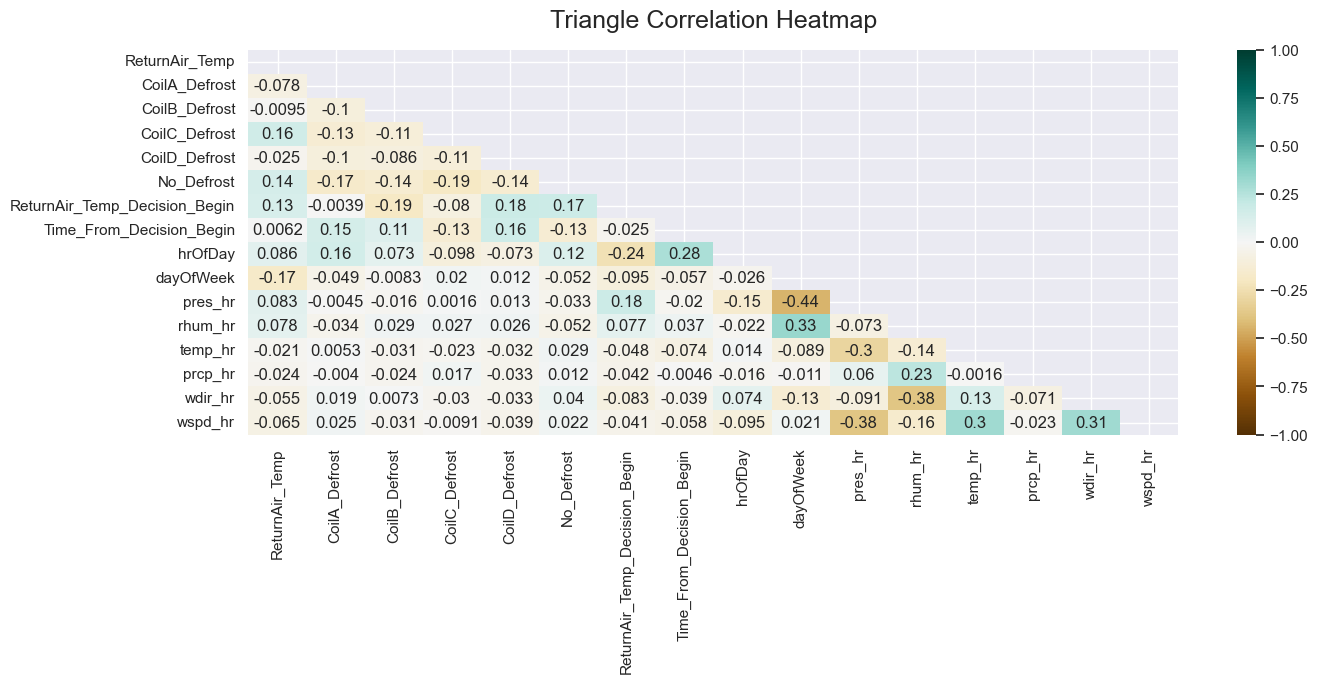

In [22]:
#Correlation Map for numeric variables:
#df = X_train_le
# define the mask to set the values in the upper triangle to True
sns.set(rc = {'figure.figsize':(15,5)})

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

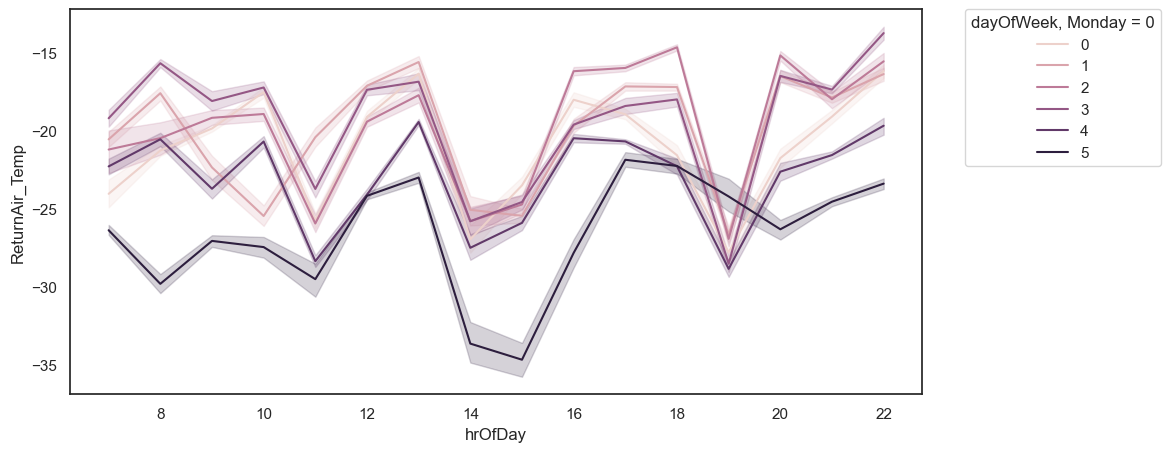

In [23]:
sns.set(rc={'figure.figsize':(11,5)})
sns.set_theme(style="white", palette=None)

sns.lineplot(data=df, x='hrOfDay', y="ReturnAir_Temp", hue="dayOfWeek")
plt.legend(bbox_to_anchor=(1.05, 1),  title = 'dayOfWeek, Monday = 0',loc=2, borderaxespad=0.)

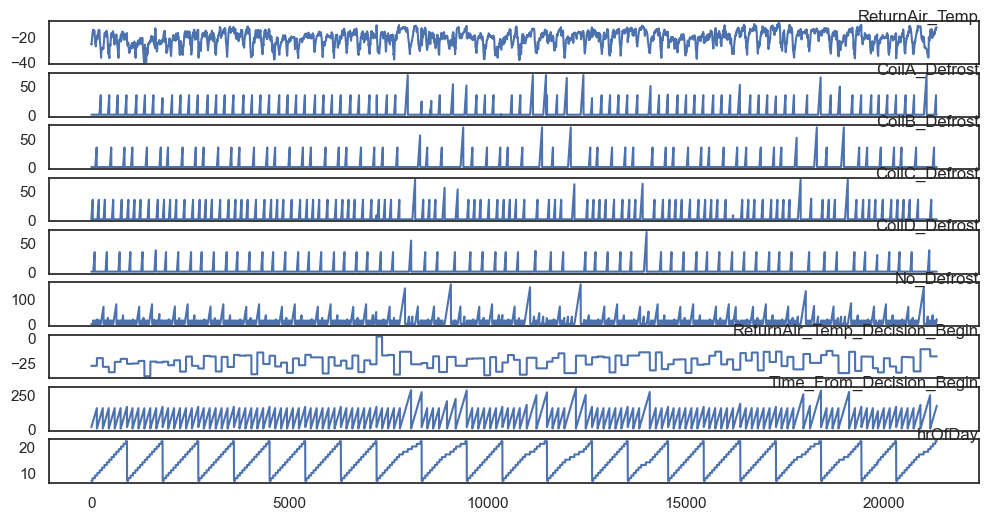

In [24]:
values = df.values
# specify columns to plot
#3,5
groups = [0,1,2,3,4,5,6,7,8]
i = 1
# plot each column
pyplot.figure(figsize=(12,6))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.8, loc='right',size = 12)
    i += 1

pyplot.show()

# df.columns

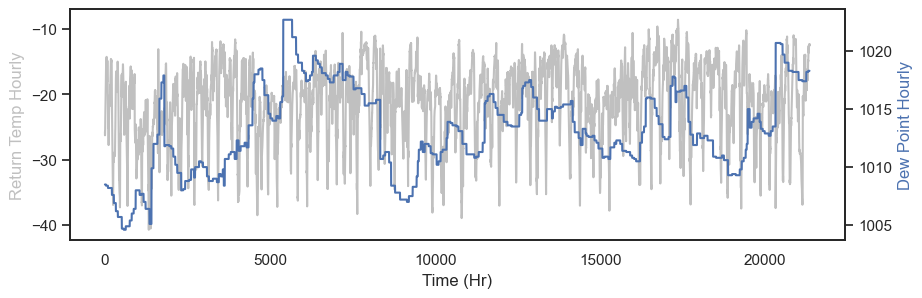

In [25]:

sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("white")
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  

y1 = list(df["ReturnAir_Temp"])
y2 = list(df["pres_hr"])

        
ax1.plot(y1, 'silver')
ax2.plot(y2, 'b-')

ax1.set_xlabel('Time (Hr)')
ax1.set_ylabel('Return Temp Hourly', color='silver')
ax2.set_ylabel('Dew Point Hourly', color='b')

plt.show()


## Modeling/Data Prepare

In [26]:
df.shape

(21342, 16)

In [27]:
df.dropna(inplace = True)
df.shape

(21342, 16)

In [28]:
y = df['ReturnAir_Temp']
X = df.drop(columns=['ReturnAir_Temp'])

In [29]:
#split the data based on the date 
split_date="05-09-2023"
X_train=X.loc[X.index <split_date].copy()
y_train=y.loc[y.index <split_date].copy()
X_test=X.loc[X.index >=split_date].copy()
y_test=y.loc[y.index >=split_date].copy()

In [30]:
X_test_orig=X.loc[X.index >= split_date].copy()

In [31]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
mm = MinMaxScaler()
X_train[X_train.columns] = mm.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = mm.transform(X_test[X_test.columns])

In [33]:
X_test.columns

Index(['CoilA_Defrost', 'CoilB_Defrost', 'CoilC_Defrost', 'CoilD_Defrost',
       'No_Defrost', 'ReturnAir_Temp_Decision_Begin',
       'Time_From_Decision_Begin', 'hrOfDay', 'dayOfWeek', 'pres_hr',
       'rhum_hr', 'temp_hr', 'prcp_hr', 'wdir_hr', 'wspd_hr'],
      dtype='object')

## Hyper Para Tuning XGboost

In [ ]:

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
#Import 'scope' from hyperopt in order to 
#obtain int values for certain hyperparameters.
from hyperopt.pyll.base import scope
hyperparameter_grid={'max_depth': scope.int(hp.quniform("max_depth", 1, 15, 1)),
                    'gamma': hp.uniform ('gamma', 1,9),
                    'reg_lambda' : hp.uniform('reg_lambda', 0,1),
                    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
                    #'n_estimators': hp.choice('n_estimators', [1000,2000,5000]),
                    'n_estimators': 2000,
                    'eta': hp.uniform('eta', 0,1),            
                    'seed': 0
                }

In [ ]:
def objective(space):
    model = xgb.XGBRegressor(**space, early_stopping_rounds=100,  eval_metric="rmse")
    #Define evaluation datasets.
    evaluation = [(X_train, y_train), (X_test, y_test)]
    #Fit the model. 
    model.fit(X_train, y_train,
            eval_set=evaluation,
            verbose=False)
    pred = model.predict(X_test)
    mse= mean_squared_error(y_test, pred)
    print ("SCORE:", mse)
    return {'loss':mse, 'status': STATUS_OK, 'model': model}

In [ ]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = hyperparameter_grid,
                        algo = tpe.suggest,
                        max_evals = 200,
                        trials = trials)

In [ ]:
best_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']
lowest_loss = trials.results[np.argmin([r['loss'] for r in trials.results])]['loss']
print(best_model, lowest_loss)

In [34]:
best_hyperparams = {'eta': 0.36605425346315756,
                     'gamma': 4.1022953723719136,
                     'max_depth': 7.0,
                     'min_child_weight': 9.0,
                     'reg_lambda': 0.7748125142610658}

In [35]:
xgb_tuned=xgb.XGBRegressor(
                    max_dept=int(best_hyperparams['max_depth']),
                    #colsample_bytree=best_hyperparams['colsample_bytree'],
                    objective='reg:squarederror',
                    tree_method='hist',
                    eval_metrics='rmse',
                    eta=best_hyperparams['eta'],
                    gamma=best_hyperparams['gamma'],
                    min_child_weight=best_hyperparams['min_child_weight'],
                    early_stopping_rounds=500,
                    n_estimators=2000
                    #n_estimators=best_hyperparams['n_estimators'],
)
xgb_tuned.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=50)

[10:01:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eval_metrics", "max_dept" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:14.65834	validation_1-rmse:13.70476
[50]	validation_0-rmse:1.05096	validation_1-rmse:4.80447
[100]	validation_0-rmse:0.74557	validation_1-rmse:4.80492
[150]	validation_0-rmse:0.74557	validation_1-rmse:4.80493
[200]	validation_0-rmse:0.74557	validation_1-rmse:4.80493
[250]	validation_0-rmse:0.74557	validation_1-rmse:4.80493
[300]	validation_0-rmse:0.74557	validation_1-rmse:4.80493
[350]	validation_0-rmse:0.74557	validation_1-rmse:4.80493
[400]	validation_0-rmse:0.74557	validation_1-rmse:4.80493
[450]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=500,
             enable_categorical=False, eta=0.36605425346315756,
             eval_metrics='rmse', gamma=4.1022953723719136, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.366054267, max_delta_step=0, max_dept=7,
             max_depth=6, min_child_weight=9.0, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='hist', ...)

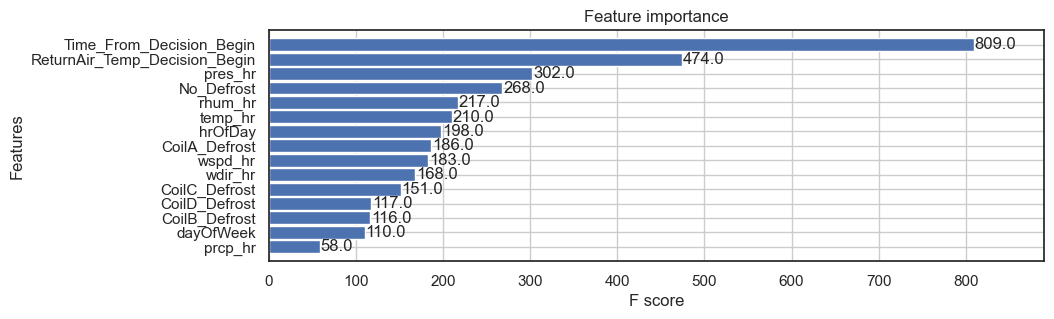

In [36]:
#clrs = ['red' if (x<288) and (x>100) else 'grey' for x in ]
_=plot_importance(xgb_tuned, height=0.9)

In [37]:
#nodes:
len(('ReturnAir_Temp_Decision_Begin','timeOfDay','pres_hr','dwpt_hr','temp_hr','wdir_hr','wspd_hr',\
     'CoilA_Defrost','CoilB_Defrost','CoilC_Defrost','CoilD_Defrost','No_Defrost'))

12

In [38]:
xgb_preds = xgb_tuned.predict(X_test)
xgb_score = mean_squared_error(y_test, xgb_preds, squared=False)
print('RMSE_Best_Model:', xgb_score)

RMSE_Best_Model: 4.804929047300482


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, xgb_preds)

0.374925966052874

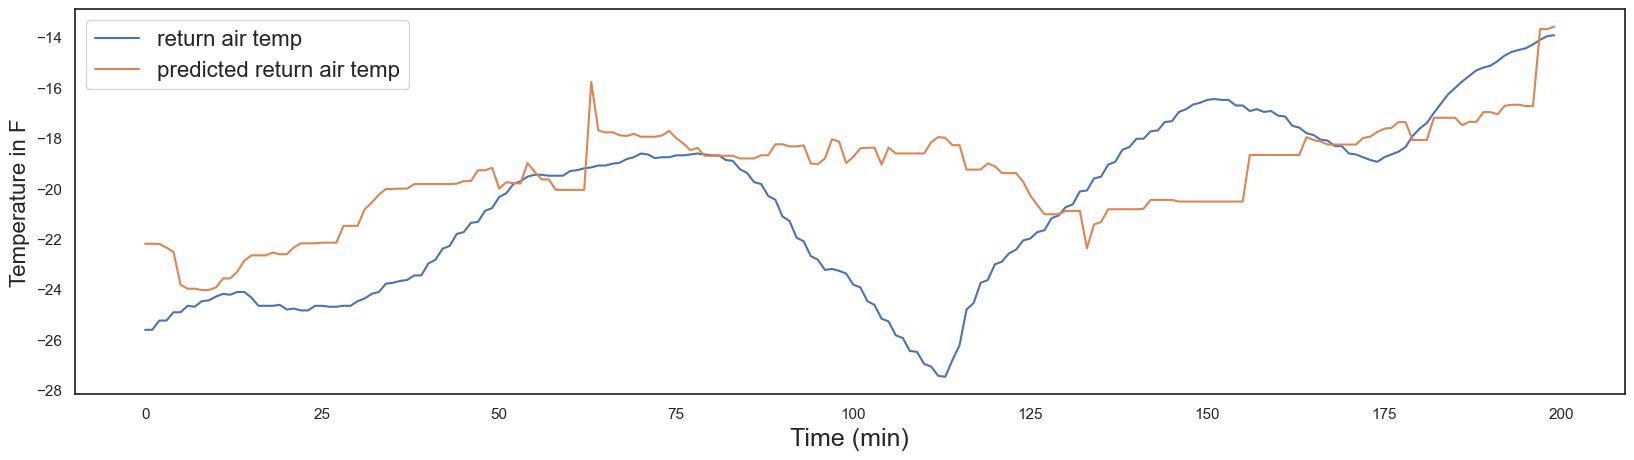

In [40]:
import random
sns.set_style("white")
i = random.choice(range(0,len(y_test)-150,150))

pyplot.figure(figsize=(20,5))
pyplot.plot(list(y_test)[i:i+200], label='return air temp')
pyplot.plot(xgb_preds[i:i+200], label='predicted return air temp')
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Temperature in F', fontsize=16)
plt.rc('legend', fontsize = 16)
pyplot.legend()
pyplot.show()

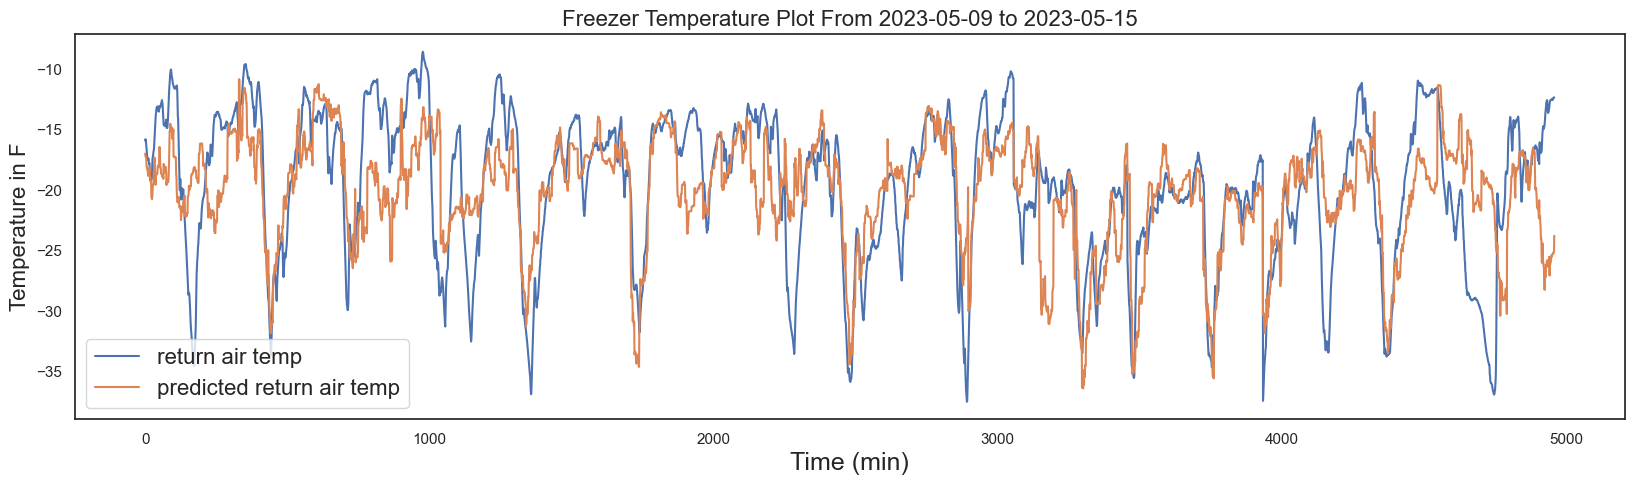

In [41]:
from random import randint
sns.set_style("white")

pyplot.figure(figsize=(20,5))
pyplot.plot(list(y_test)[0:-1], label='return air temp')
pyplot.plot(xgb_preds[0:-1], label='predicted return air temp')
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Temperature in F', fontsize=16)
plt.rc('legend', fontsize = 16)
plt.title(f"Freezer Temperature Plot From {str(min(X_test.index))[:10]} to {str(max(X_test.index))[:10]}", fontsize = 16)
pyplot.legend()
pyplot.show()

In [42]:
X_test.columns

Index(['CoilA_Defrost', 'CoilB_Defrost', 'CoilC_Defrost', 'CoilD_Defrost',
       'No_Defrost', 'ReturnAir_Temp_Decision_Begin',
       'Time_From_Decision_Begin', 'hrOfDay', 'dayOfWeek', 'pres_hr',
       'rhum_hr', 'temp_hr', 'prcp_hr', 'wdir_hr', 'wspd_hr'],
      dtype='object')

In [43]:
# need to make decision on off start from actual time of the day. do onoff first then cut hours. 

# Optimization

In [44]:
def end_defrost_temp(i):
    # this function find the instruction and transformed to the way prediciton model wants to see. 
    n=int(np.argmax(i[0:5]))
    timer = i[5]
    mx = np.array([list(i)]*timer)
    mx[:, n] = [j for j in range(0,timer)]
    mx = np.delete(mx, 5, 1)
    mx = mm.transform(mx)
    xgb_preds = xgb_tuned.predict(mx)
    e = mean_squared_error([TARGET_TEMP]*len(xgb_preds), xgb_preds, squared=True)
    return xgb_preds[-1],xgb_preds,e

In [45]:
def arc_cost(s):
    costs = {}
    temps = {}
    for (i,j) in s:
        costs[(i,j)] = end_defrost_temp(i[:-1])[2]
        temps[(i,j)] = end_defrost_temp(i[:-1])[1]
    return costs,temps

decisions = [[1., 0., 0., 0., 0., 35],
             [0., 1., 0., 0., 0., 35],
             [0., 0., 1., 0., 0., 35],
             [0., 0., 0., 1., 0., 35],
             [0., 0., 0., 0., 1.,  5],
             [0., 0., 0., 0., 1., 10],
             [0., 0., 0., 0., 1., 15],
             [0., 0., 0., 0., 1., 20],
             [0., 0., 0., 0., 1., 25],
             [0., 0., 0., 0., 1., 30]]

In [46]:
decisions = [[1., 0., 0., 0., 0., 35],
             [0., 1., 0., 0., 0., 35],
             [0., 0., 1., 0., 0., 35],
             [0., 0., 0., 1., 0., 35],
             [0., 0., 0., 0., 1.,  5],
             [0., 0., 0., 0., 1., 10],
             [0., 0., 0., 0., 1., 20]]

## Optimization loop

In [49]:
dates = np.unique([i.strftime('%m/%d/%Y') for i in X_test.index.date])
#dates = ['2023-05-08']
TARGET_TEMP = -25
solutions = {}
dd = 0
for date in dates:
    dt_0 = pd.to_datetime(f"{date} 07:30:00.000")
    while dt_0 < pd.to_datetime(f"{date} 22:30:00.000"):
        start = time.time()
        print(f'working on {dt_0}, creating network')
        # this is the starting node for each batch of optimization network. it start with index 5 to include present temp.
        node_0 = X_test_orig.iloc[X_test_orig.index.get_loc(dt_0, method='nearest')][5:]      
        if dt_0 == pd.to_datetime(f"{date} 07:30:00.000"):
            #start with position 0 which is (1,0,0,0,0....), dd is unique id for each generated node
            node_0 = [tuple(list(decisions[0])+list(node_0)+[dd])]
            dd = dd+1
        # if not first node of that day that means we need to use previous solution's last node, which always end with sink.
        else:
            decision_prev = [i for (i,j) in Arcs if select[(i,j)].solution_value == 1 and j == 'sink']
            n=int(np.argmax(decision_prev[0][0:5]))
            node_0 = [tuple(list(decisions[n])+list(node_0)+[dd])]
            dd = dd+1
        # will make 1,2,3,4,5 numbers, this is to generate time interval, right now it's hard code to look ahead 2.5 hours
        # which means we need 5 30mins intervals
        for t in range(1,6):
            globals()[f'dt_{t}'] = globals()[f'dt_{t-1}'] + timedelta(hours=0.5)
            globals()[f'node_{t}'] = X_test_orig.iloc[X_test_orig.index.get_loc(globals()[f'dt_{t}'], method='nearest')][6:]
        
        # this part connects the nodes in a dictionary form, the key is the origin node and the values dict is the 
        # nodes the origin connects to. 
        node_1_dict = {}
        for n in node_0:
            node_1_dict[n] = [tuple(list(i)+[end_defrost_temp(n[:-1])[0]]+list(node_1)+[dd]) for i in decisions]
            dd = dd+1
        for p in range(2,6):
            globals()[f'node_{p}_dict'] = {}
            for q in globals()[f'node_{p-1}_dict'].keys():
                for n in globals()[f'node_{p-1}_dict'][q]:
                    globals()[f'node_{p}_dict'][n] = [tuple(list(i)+[end_defrost_temp(n[:-1])[0]]+list(globals()[f'node_{p}']) + [dd]) for i in decisions]
                    dd = dd+1
        
        # unpacking dict from previous into list of arcs. 
        #s0 = [(i,j) for i in node_1_dict.keys() for j in node_1_dict[i]]
        #s1 = [(i,j) for i in node_2_dict.keys() for j in node_2_dict[i]]
        #s2 = [(i,j) for i in node_3_dict.keys() for j in node_3_dict[i]]
        #s3 = [(i,j) for i in node_4_dict.keys() for j in node_4_dict[i]]
        #s4 = [(i,j) for i in node_5_dict.keys() for j in node_5_dict[i]]
        #s5 = [(j,'sink') for (i,j) in s4]
        
        
        
        def unpacking(n):
            var = globals()[f'node_{n+1}_dict']
            globals()[f's{n}'] = [(i,j) for i in var.keys() for j in var[i]]

        threads = [threading.Thread(target=unpacking, args=(n,)) for n in range(0,5)]
        [t.start() for t in threads]
        [t.join() for t in threads]  
        
        s5 = [(j,'sink') for (i,j) in s4]
        
            
        Arcs = set(s0 + s1 + s2 + s3 + s4 + s5)
        Arcs_cost = arc_cost(s0)[0]|arc_cost(s1)[0]|arc_cost(s2)[0]|arc_cost(s3)[0]|arc_cost(s4)[0]|arc_cost(s5)[0]
        Arcs_temp = arc_cost(s0)[1]|arc_cost(s1)[1]|arc_cost(s2)[1]|arc_cost(s3)[1]|arc_cost(s4)[1]|arc_cost(s5)[1]
        end = time.time()
        print(f'number of arcs is {len(Arcs_cost)}, total time spent is {end-start}s')
        print('setting network flow objective and constraints')
        start = time.time()
        # Define node supply
        Supply = {}
        for (i,j) in Arcs:
            #if i!=j:
                Supply[i] = 0
                Supply[j] = 0

        Supply[node_0[0]] = -1
        Supply['sink'] = 1

        from docplex.mp.model import Model
        mdl = Model()
        mdl.clear_constraints()
        mdl.remove_objective()

        # variables
        #select = mdl.continuous_var_dict(Arcs, lb=0, name='select')
        select = mdl.binary_var_dict(Arcs, lb=0, name='select')

        # objective
        mdl.minimize(mdl.sum(Arcs_cost[i]*select[i] for i in Arcs))

        ######### flow conservation constraint
        con ={}
        #for j in Supply.keys():
            #inflow = mdl.sum(select[i,j] for i in Supply.keys() if (i,j) in Arcs)
            #outflow = mdl.sum(select[j,i] for i in Supply.keys() if (j,i) in Arcs)
            #con[j] = mdl.add_constraint(inflow - outflow == Supply[j])
        
        #######Method 2 of adding flow conservation constraint
        
        #def addFlowConservation(j):
            #inflow = mdl.sum(select[i,j] for i in Supply.keys() if (i,j) in Arcs)
            #outflow = mdl.sum(select[j,i] for i in Supply.keys() if (j,i) in Arcs)
            #con[j] = mdl.add_constraint(inflow - outflow == Supply[j])

        #results = {}
        #threads = [threading.Thread(target=addFlowConservation, args=(j, )) for j in Supply.keys()]
        #[t.start() for t in threads]
        #[t.join() for t in threads]
        #######Method 3 of adding flow conservation constraint
        #d = []
        #nthread = 3
        #cut = len(Supply)//nthread
        #for n in range(1,nthread+1):
            #if n == 1:
                #d.append(dict(list(Supply.items())[:n*cut]))
            #elif n == nthread:
                #d.append(dict(list(Supply.items())[(n-1)*cut:]))
            #else:
                #d.append(dict(list(Supply.items())[(n-1)*cut:n*cut]))

        #def addFlowConservation(part):
            #for j in part.keys():
                #inflow = mdl.sum(select[i,j] for i in part.keys() if (i,j) in Arcs)
                #outflow = mdl.sum(select[j,i] for i in part.keys() if (j,i) in Arcs)
                #con[j] = mdl.add_constraint(inflow - outflow == part[j])
        
        #threads = [threading.Thread(target=addFlowConservation, args=(part, )) for part in d]
        #[t.start() for t in threads]
        #[t.join() for t in threads]

        d1 = dict(list(Supply.items())[:len(Supply)//2])
        d2 = dict(list(Supply.items())[len(Supply)//2:])
        
        def addFlowConservation(part):
            for j in part.keys():
                inflow = mdl.sum(select[i,j] for i in part.keys() if (i,j) in Arcs)
                outflow = mdl.sum(select[j,i] for i in part.keys() if (j,i) in Arcs)
                con[j] = mdl.add_constraint(inflow - outflow == part[j])
                
        t1 = threading.Thread(target=addFlowConservation, args=(d1,))
        t2 = threading.Thread(target=addFlowConservation, args=(d2,))

        t1.start()
        t2.start()

        t1.join()
        t2.join()
        
        
        coil_defrost = {}
        coil_defrost_time = {}
        end = time.time()
        print(f'total time adding flow objective and constraints is {end - start}')
        start = time.time()
        print('adding node contraints...')
        # adding constraints like at least defrost once in this 2.5 cycle or last. 
        # if first cycle don't look back last cycle:
        if dt_0 == pd.to_datetime(f"{date} 07:30:00.000"):
            for w in range(0,4):
                coil_defrost[w]= mdl.add_constraint(mdl.sum(select[i,j]*i[w] for (i,j) in Arcs) <= 1)
            coil_defrost_time[w] = mdl.add_constraint(mdl.sum(select[i,j]*i[5] for (i,j) in Arcs) == 150)
        else:
            previous_time = dt_0 - timedelta(hours=2.5)
            previous_time_sol = [i[:6] for (i,j) in list(solutions[previous_time].keys())]
            previous_time_sol = np.array([list(i) for i in previous_time_sol]).sum(axis = 0)
            previous_time_sol = [int(i) for i in previous_time_sol]
            for w in range(0,4):
                coil_defrost[w]= mdl.add_constraint(mdl.sum(select[i,j]*i[w] + previous_time_sol[w] for (i,j) in Arcs) >= 1)
            coil_defrost_time[w] = mdl.add_constraint(mdl.sum(select[i,j]*i[5] + previous_time_sol[5] for (i,j) in Arcs) >= 280)
            #coil_defrost_time[w] = mdl.add_constraint(mdl.sum(select[i,j]*i[5] + previous_time_sol[5] for (i,j) in Arcs) <= 320)
        end = time.time()
        print(f'total time adding node constraints is {end - start}')
        print('solving...')
        # solve
        start = time.time()
        mdl.solve()
        end = time.time()
        print(f'solved...total solving time is {end - start}')
        solutions[dt_0] = {(i,j):Arcs_temp[(i,j)] for (i,j) in Arcs if select[(i,j)].solution_value == 1}

        dt_0 = dt_0 + timedelta(hours=2.5)


working on 2023-05-09 07:30:00, creating network
number of arcs is 36414, total time spent is 131.02292490005493s
setting network flow objective and constraints
total time adding flow objective and constraints is 185.82581901550293
adding node contraints...
total time adding node constraints is 0.38687920570373535
solving...
solved...total solving time is 3.099297046661377
working on 2023-05-09 10:00:00, creating network
number of arcs is 36414, total time spent is 126.81988883018494s
setting network flow objective and constraints
total time adding flow objective and constraints is 175.9534080028534
adding node contraints...
total time adding node constraints is 0.7147300243377686
solving...
solved...total solving time is 0.26776599884033203
working on 2023-05-09 12:30:00, creating network
number of arcs is 36414, total time spent is 255.3432319164276s
setting network flow objective and constraints
total time adding flow objective and constraints is 274.0415699481964
adding node contra

DOcplexException: Model<docplex_model7> did not solve successfully

In [52]:
list(Supply)[1855]

(0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 20,
 -15.098975,
 100.0,
 9.0,
 2.0,
 1016.5,
 87.0,
 19.4,
 0.0,
 80.0,
 11.2,
 16865)

In [ ]:
nthread = 2

len(Supply)//nthread

In [ ]:
len(Supply)

In [ ]:
def chunks(data, SIZE=10000):
    it = iter(data)
    for i in range(0, len(data), SIZE):
        return {k:data[k] for k in islice(it, SIZE)}

In [ ]:
for item in chunks(Supply, 3):
    d.append(item)

In [ ]:
Supply

In [ ]:
d = []

In [ ]:
[int(i) for i in previous_time_sol]

In [ ]:
mdl.print_solution()

In [ ]:
mdl.get_solve_details()

In [ ]:
solutions[pd.to_datetime(f"{date} 07:30:00.000")].keys()

In [ ]:
[i[:6] for (i,j) in list(solutions[pd.to_datetime(f"{date} 07:30:00.000")].keys())]

In [ ]:
l = []
dates = np.unique([i.strftime('%m/%d/%Y') for i in X_test.index.date])
#dates = ['2023-05-08']
for date in dates:
    for n in range(0,6):
        time = pd.to_datetime(f"{date} 07:30:00.000") + timedelta(hours=n*2.5)
        
        start_id = min([i[-1] for (i,j) in list(solutions[time].keys())])
        start = [(i,j) for (i,j) in list(solutions[time].keys()) if i[-1] == start_id][0]
        
        l = l + list(solutions[time][start])
        i = start

        while i[1] != 'sink':
            for j in solutions[time].keys():
                if i != j:
                    if i[1] == j[0]:
                        l = l + list(solutions[time][j])
                        i = j
                        break

In [ ]:
sd_0 = np.std(list(xgb_preds)[0:len(l)])
print(f'Predicted Temp Existing Defrost Sequence Standard Deviation: {sd_0:.2f}')

sd_2 = np.std(list(y_test)[0:len(l)])
print(f'Temp Actual Standard Deviation: {sd_2:.2f}')

sd_1 = np.std(l)
print(f'Predicted Temp Optimized Defrost Sequence Standard Deviation: {sd_1:.2f}')

percent_reduction = round((sd_0 - sd_1)*100/sd_0,2)
print(f'Standard Deviation Reduction After Optimization: {percent_reduction}%')

In [ ]:
from random import randint
sns.set_style("white")

pyplot.figure(figsize=(20,6))
pyplot.plot(list(y_test)[0:len(l)], color='gainsboro', label=f'Actual return air temp sd {sd_2:.2f}')

pyplot.plot(list(xgb_preds)[0:len(l)],color='silver',  label=f'Prdicted return air temp, sd: {sd_0:.2f}')

pyplot.plot(l,color='dodgerblue', label=f'Optimized return air temp sd: {sd_1:.2f}')
plt.xlabel('Time (min)', fontsize=18)
plt.ylabel('Temperature in F', fontsize=16)
plt.title(f'Optimized Return Air Temp Reduced Standard Deviation (SD) by {percent_reduction}%',fontsize = 20)
plt.rc('legend', fontsize = 16)
pyplot.legend()
pyplot.show()

## Get decisions:

In [ ]:
d = []
dates = np.unique([i.strftime('%m/%d/%Y') for i in X_test.index.date])
#dates = ['2023-05-08']
for date in dates:
    for n in range(0,6):
        time = pd.to_datetime(f"{date} 07:30:00.000") + timedelta(hours=n*2.5)
        
        d = d + sorted([i[:6] for (i,j) in list(solutions[time].keys())], key=lambda x: x[-1])
        

In [ ]:
sum([i[-1] for i in d])

In [ ]:
d

## covert decisions into time sequence, n is which col, ex. 0 == A

In [ ]:
from itertools import repeat

def convert_to_timeSequence(instruction_list,n):
    coil_instr = []
    for i in instruction_list:
        if np.argmax(i[:5]) == n:
            if np.argmax(i) != 4:
                coil_instr = coil_instr + list(repeat(1, 35))
            else:
                coil_instr = coil_instr + list(repeat(1, i[5]))
        elif np.argmax(i) == 4:
            coil_instr = coil_instr + list(repeat(0, i[5])) 
        else:
            coil_instr = coil_instr + list(repeat(0, 35))
        
    return coil_instr

In [ ]:
CoilA_instructions = convert_to_timeSequence(d,0)
CoilB_instructions = convert_to_timeSequence(d,1)
CoilC_instructions = convert_to_timeSequence(d,2)
CoilD_instructions = convert_to_timeSequence(d,3)
NoDefrost_instructions = convert_to_timeSequence(d,4)

In [ ]:
CoilA_instructions = count_continuous_ones(CoilA_instructions)
CoilB_instructions = count_continuous_ones(CoilB_instructions)
CoilC_instructions = count_continuous_ones(CoilC_instructions)
CoilD_instructions = count_continuous_ones(CoilD_instructions)
NoDefrost_instructions = count_continuous_ones(NoDefrost_instructions)

In [ ]:
X_test_orig.columns

In [ ]:
split_date="05-08-2023"
X_test_orig=df.loc[df.index >= split_date].copy()
ReturnAir_Temp = list(X_test_orig['ReturnAir_Temp'])
CoilA_Defrost = list(X_test_orig['CoilA_Defrost'])
CoilB_Defrost = list(X_test_orig['CoilB_Defrost'])
CoilC_Defrost = list(X_test_orig['CoilC_Defrost'])
CoilD_Defrost = list(X_test_orig['CoilD_Defrost'])
No_Defrost = list(X_test_orig['No_Defrost'])

In [ ]:
df_instructions = pd.DataFrame(list(zip(ReturnAir_Temp,l,CoilA_instructions, CoilB_instructions,CoilC_instructions,CoilD_instructions,NoDefrost_instructions,
                                        CoilA_Defrost,CoilB_Defrost,CoilC_Defrost,CoilD_Defrost,No_Defrost)),
                                columns =['ReturnAir_Temp','Optimized_ReturnAir_Temp','CoilA_instructions', 'CoilB_instructions','CoilC_instructions','CoilD_instructions','NoDefrost_instructions',
                                         'CoilA_Defrost','CoilB_Defrost','CoilC_Defrost','CoilD_Defrost','No_Defrost'])

In [ ]:
values = df_instructions.values
# specify columns to plot
#3,5
groups = [1,2,3,4,5,6]
i = 1
# plot each column
pyplot.figure(figsize=(12,6))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df_instructions.columns[group], y=0.7, loc='right',size = 12)
    i += 1

pyplot.show()

In [ ]:
values = df_instructions.values
# specify columns to plot
#3,5
groups = [0,7,8,9,10,11]
i = 1
# plot each column
pyplot.figure(figsize=(12,6))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df_instructions.columns[group], y=0.7, loc='right',size = 12)
    i += 1

pyplot.show()

In [ ]:
len(X_test_orig)

In [ ]:
from random import randint

In [ ]:
a = [randint(0,10**6) for i in range(0,5*10**17)]

In [ ]:
a.sort()

In [ ]:
len(a)